In [1]:
import ingenos
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

##### set base directories

In [2]:
base_dir = "../../../data/amplicon_sequencing/funestus/"

##### import and munge amplicon sequencing data

In [3]:
amp_output = pd.read_csv(base_dir + "Afun_genotype_AS.csv", 
                           index_col = 0)
amp_output.head()

,Sample,Raw Reads,On-Target Reads,%On-Target,%GT,IFI,2Ra_26087506,2Ra_26099532,2Ra_26111277,2Ra_26212609,...,3Rb_30123420,3Rb_30516692,3Rb_30661948,3Rb_30738354,3Rb_30739440,3Rb_30902012,3Rb_31397626,3Rb_31568791,3Rb_32435459,3Rb_32492194
0,GTseq_012_GTseq-i5_01_PLATE2_A01,279181,178545,63.95,97.78,0.20,11,11,11,11,...,12,11,11,12,11,11,11,11,11,11
1,GTseq_012_GTseq-i5_02_PLATE2_B01,153060,94210,61.55,96.67,0.24,11,11,11,11,...,11,11,11,0,11,11,11,11,11,11
2,GTseq_012_GTseq-i5_03_PLATE2_C01,81137,55467,68.36,95.56,0.46,11,0,11,11,...,11,11,11,0,11,11,11,11,11,11
3,GTseq_012_GTseq-i5_04_PLATE2_D01,179924,118383,65.80,83.33,0.44,22,0,22,22,...,12,0,12,0,11,12,12,0,12,11
4,GTseq_012_GTseq-i5_05_PLATE2_E01,162062,95472,58.91,94.44,0.29,11,0,11,11,...,11,11,11,0,11,11,11,11,11,11


In [4]:
amp_output["Sample"] = ["_".join(item[-2:]) for item in amp_output["Sample"].str.split("_")]

In [5]:
amp_trimmed = amp_output.set_index("Sample").iloc[:,5:]

amp_column_list = [item[0] for item in amp_output.set_index(
    "Sample").iloc[:,5:].columns.str.split('_')]

In [6]:
amp_trimmed.head()

,2Ra_26087506,2Ra_26099532,2Ra_26111277,2Ra_26212609,2Ra_26213556,2Ra_26558370,2Ra_26854967,2Ra_26856512,2Ra_26945231,2Ra_27077779,...,3Rb_30123420,3Rb_30516692,3Rb_30661948,3Rb_30738354,3Rb_30739440,3Rb_30902012,3Rb_31397626,3Rb_31568791,3Rb_32435459,3Rb_32492194
Sample,,,,,,,,,,,,,,,,,,,,,
PLATE2_A01,11,11,11,11,11,11,11,11,11,11,...,12,11,11,12,11,11,11,11,11,11
PLATE2_B01,11,11,11,11,11,11,11,11,11,11,...,11,11,11,0,11,11,11,11,11,11
PLATE2_C01,11,0,11,11,11,11,11,11,11,11,...,11,11,11,0,11,11,11,11,11,11
PLATE2_D01,22,0,22,22,22,22,0,22,0,22,...,12,0,12,0,11,12,12,0,12,11
PLATE2_E01,11,0,11,11,11,11,11,11,11,11,...,11,11,11,0,11,11,11,11,11,11


##### add metadata

In [7]:
amp_cyto = pd.read_excel(base_dir + 'AFUN_ALL_3_PLATES_11Feb19_v2.xlsx', 
                         index_col = False)
amp_cyto.head()

,Plate name,Row,Column,volume,conc,SpecimenID,Date of collection,Year,Season,Month,...,X_2S,X_3A,X_3B,X_5A,2RAS,Kariotype,chormosomal form,READER,CSP,Blood meal
0,PLATE_01,A,1,25ul,NaN,00-00021,2000-01-04,2000.0,99-00,1.0,...,0,0,0,0,00,00000,Kiribina,Moussa,carcass for ND,NaN
1,PLATE_01,A,2,25ul,NaN,00-00022,2000-01-04,2000.0,99-00,1.0,...,0,0,0,0,00,00000,Kiribina,Moussa,carcass for ND,NaN
2,PLATE_01,A,3,25ul,NaN,00-00024,2000-01-04,2000.0,99-00,1.0,...,1,1,0,0,01,01100,Kiribina,Moussa,carcass for ND,NaN
3,PLATE_01,A,4,25ul,NaN,00-00025,2000-01-04,2000.0,99-00,1.0,...,0,1,2,0,00,00120,Folonzo,Moussa,carcass for ND,NaN
4,PLATE_01,A,5,25ul,NaN,00-00029,2000-01-04,2000.0,99-00,1.0,...,0,0,0,0,00,00000,Kiribina,Moussa,carcass for ND,NaN


In [8]:
amp_cyto = amp_cyto[["Plate name", "Row", "Column", "SpecimenID", "X_2A", 
                     "X_3A", "X_3B"]]

amp_cyto.rename(columns = {"X_2A" : "2Ra",
                      "X_3A" : "3Ra",
                      "X_3B" : "3Rb",
                      "SpecimenID" : "ID"}, inplace=True)

amp_cyto.head()

,Plate name,Row,Column,ID,2Ra,3Ra,3Rb
0,PLATE_01,A,1,00-00021,0,0,0
1,PLATE_01,A,2,00-00022,0,0,0
2,PLATE_01,A,3,00-00024,0,1,0
3,PLATE_01,A,4,00-00025,0,1,2
4,PLATE_01,A,5,00-00029,0,0,0


In [9]:
np.sum(amp_cyto["ID"].isnull())

50

In [10]:
amp_cyto.shape

(288, 7)

In [11]:
amp_cyto = amp_cyto.loc[~(amp_cyto["ID"].isnull()), :]
amp_cyto.shape

(238, 7)

In [12]:
amp_cyto.head()

,Plate name,Row,Column,ID,2Ra,3Ra,3Rb
0,PLATE_01,A,1,00-00021,0,0,0
1,PLATE_01,A,2,00-00022,0,0,0
2,PLATE_01,A,3,00-00024,0,1,0
3,PLATE_01,A,4,00-00025,0,1,2
4,PLATE_01,A,5,00-00029,0,0,0


In [13]:
amp_cyto["Specimen"] = amp_cyto["Plate name"].replace(
    regex=True, to_replace="_0", value="").replace(
    regex=True, to_replace="_", value="") +\
"_" + amp_cyto["Row"].map(str) + amp_cyto["Column"].astype(str).str.zfill(2)

amp_cyto.head()

,Plate name,Row,Column,ID,2Ra,3Ra,3Rb,Specimen
0,PLATE_01,A,1,00-00021,0,0,0,PLATE1_A01
1,PLATE_01,A,2,00-00022,0,0,0,PLATE1_A02
2,PLATE_01,A,3,00-00024,0,1,0,PLATE1_A03
3,PLATE_01,A,4,00-00025,0,1,2,PLATE1_A04
4,PLATE_01,A,5,00-00029,0,0,0,PLATE1_A05


In [14]:
amp_cyto.loc[amp_cyto["ID"] == "01-01035"]

,Plate name,Row,Column,ID,2Ra,3Ra,3Rb,Specimen
168,PLATE_02,G,1,01-01035,0,0,0,PLATE2_G01


In [15]:
amp_columns = amp_trimmed.columns

In [16]:
amp_trimmed = pd.merge(amp_trimmed.reset_index(), amp_cyto, 
                       left_on = "Sample", right_on = "Specimen")\
[np.append(amp_columns, ["Specimen", "ID"])].set_index(["Specimen","ID"])

amp_trimmed.head()

,,2Ra_26087506,2Ra_26099532,2Ra_26111277,2Ra_26212609,2Ra_26213556,2Ra_26558370,2Ra_26854967,2Ra_26856512,2Ra_26945231,2Ra_27077779,...,3Rb_30123420,3Rb_30516692,3Rb_30661948,3Rb_30738354,3Rb_30739440,3Rb_30902012,3Rb_31397626,3Rb_31568791,3Rb_32435459,3Rb_32492194
Specimen,ID,,,,,,,,,,,,,,,,,,,,,
PLATE2_A01,00-02989,11,11,11,11,11,11,11,11,11,11,...,12,11,11,12,11,11,11,11,11,11
PLATE2_B01,01-00211,11,11,11,11,11,11,11,11,11,11,...,11,11,11,0,11,11,11,11,11,11
PLATE2_C01,01-00282,11,0,11,11,11,11,11,11,11,11,...,11,11,11,0,11,11,11,11,11,11
PLATE2_D01,01-00300,22,0,22,22,22,22,0,22,0,22,...,12,0,12,0,11,12,12,0,12,11
PLATE2_E01,01-00512,11,0,11,11,11,11,11,11,11,11,...,11,11,11,0,11,11,11,11,11,11


In [17]:
amp_trimmed = amp_trimmed.T

amp_trimmed["label"] = amp_column_list

amp_trimmed["assay"] = amp_trimmed.index

amp_trimmed.head()

Specimen,PLATE2_A01,PLATE2_B01,PLATE2_C01,PLATE2_D01,PLATE2_E01,PLATE2_F01,PLATE2_G01,PLATE2_H01,PLATE2_A02,PLATE2_B02,...,PLATE3_C10,PLATE3_D10,PLATE3_A11,PLATE3_B11,PLATE3_C11,PLATE3_A12,PLATE3_B12,PLATE3_C12,label,assay
ID,00-02989,01-00211,01-00282,01-00300,01-00512,01-00569,01-01035,01-04991,00-02991,01-00212,...,02-06330,02-07776,02-06286,02-06311,02-06332,02-06288,02-06314,02-06335,,
2Ra_26087506,11,11,11,22,11,11,11,11,11,11,...,22,11,0,22,11,22,11,11,2Ra,2Ra_26087506
2Ra_26099532,11,11,0,0,0,0,0,11,11,11,...,11,0,0,0,11,0,0,0,2Ra,2Ra_26099532
2Ra_26111277,11,11,11,22,11,11,11,11,0,11,...,12,11,22,22,11,22,11,11,2Ra,2Ra_26111277
2Ra_26212609,11,11,11,22,11,11,11,11,11,11,...,12,11,12,22,11,22,12,11,2Ra,2Ra_26212609
2Ra_26213556,11,11,11,22,11,11,11,11,11,11,...,12,11,12,22,11,22,12,11,2Ra,2Ra_26213556


In [18]:
amp_trimmed = amp_trimmed.reset_index(drop=True).set_index(["label","assay"]).T

amp_trimmed.head()

label                        2Ra                                         \
assay               2Ra_26087506 2Ra_26099532 2Ra_26111277 2Ra_26212609   
Specimen   ID                                                             
PLATE2_A01 00-02989           11           11           11           11   
PLATE2_B01 01-00211           11           11           11           11   
PLATE2_C01 01-00282           11            0           11           11   
PLATE2_D01 01-00300           22            0           22           22   
PLATE2_E01 01-00512           11            0           11           11   

label                                                                    \
assay               2Ra_26213556 2Ra_26558370 2Ra_26854967 2Ra_26856512   
Specimen   ID                                                             
PLATE2_A01 00-02989           11           11           11           11   
PLATE2_B01 01-00211           11           11           11           11   
PLATE2_C01 01-00282           11           11           11           11   
PLATE2_D01 01-00300           22           22            0           22   
PLATE2_E01 01-00512           11           11           11           11   

label                                          ...          3Rb               \
assay               2Ra_26945231 2Ra_27077779  ... 3Rb_30123420 3Rb_30516692   
Specimen   ID                                  ...                             
PLATE2_A01 00-02989           11           11  ...           12           11   
PLATE2_B01 01-00211           11           11  ...           11           11   
PLATE2_C01 01-00282           11           11  ...           11           11   
PLATE2_D01 01-00300            0           22  ...           12            0   
PLATE2_E01 01-00512           11           11  ...           11           11   

label                                                                    \
assay               3Rb_30661948 3Rb_30738354 3Rb_30739440 3Rb_30902012   
Specimen   ID                                                             
PLATE2_A01 00-02989           11           12           11           11   
PLATE2_B01 01-00211           11            0           11           11   
PLATE2_C01 01-00282           11            0           11           11   
PLATE2_D01 01-00300           12            0           11           12   
PLATE2_E01 01-00512           11            0           11           11   

label                                                                    
assay               3Rb_31397626 3Rb_31568791 3Rb_32435459 3Rb_32492194  
Specimen   ID                                                            
PLATE2_A01 00-02989           11           11           11           11  
PLATE2_B01 01-00211           11           11           11           11  
PLATE2_C01 01-00282           11           11           11           11  
PLATE2_D01 01-00300           12            0           12           11  
PLATE2_E01 01-00512           11           11           11           11  

[5 rows x 90 columns]

In [19]:
amp_trimmed.replace(to_replace={0 : np.nan,
            11 : 0,
            12 : 1,
            22 : 2}, value=None, inplace=True)

In [20]:
amp_trimmed.shape

(235, 90)

In [21]:
inversions = amp_trimmed.columns.levels[0]

inversions

Index(['2Ra', '3Ra', '3Rb'], dtype='object', name='label')

##### read in the OpenArray data

In [22]:
oa_results = pd.read_csv(base_dir + "final_afun_wide.csv",
                        na_values = -9)

oa_results.set_index("SampleID", inplace=True)

oa_results.head()

,3Ra:10488834_C_T,3Ra:10812270_T_A,3Ra:10870174_C_T,3Ra:11009607_C_G,3Ra:2008898_C_T,3Ra:2055956_T_G,3Ra:2097318_C_G,3Ra:2101786_A_T,3Ra:2486161_A_C,3Ra:3507910_C_G,...,3Rb:21916268_C_T,3Rb:22631746_A_G,3Rb:23021477_T_C,3Rb:23302727_A_G,3Rb:26776397_G_A,3Rb:28574306_C_T,3Rb:28578288_T_C,3Rb:29236594_A_T,3Rb:30063069_C_G,3Rb:30661948_T_C
SampleID,,,,,,,,,,,,,,,,,,,,,
00-00025,1,1.0,1,1,1,1.0,1,1,1.0,1,...,1.0,2.0,2.0,1.0,2.0,2,2,2,2.0,2
00-00032,0,2.0,2,2,2,2.0,2,2,2.0,2,...,1.0,1.0,1.0,1.0,0.0,0,1,0,1.0,1
00-00095,1,1.0,1,1,1,1.0,1,1,1.0,1,...,0.0,1.0,1.0,1.0,0.0,1,1,1,1.0,1
00-00134,0,1.0,1,2,1,1.0,2,2,2.0,1,...,1.0,1.0,1.0,2.0,1.0,1,1,1,NaN,1
00-00136,2,2.0,2,2,1,1.0,2,2,2.0,2,...,0.0,1.0,1.0,2.0,1.0,1,0,0,1.0,2


In [23]:
oa_results = oa_results.T

oa_results["inversion"] = oa_results.reset_index()["index"].str.split(
    ":", expand=True)[0].values

oa_results["pos"] =\
oa_results.reset_index()["index"].str.split(
    ":", expand=True)[1].str.split("_", expand=True)[0].map(int).values

oa_results.head()

SampleID,00-00025,00-00032,00-00095,00-00134,00-00136,00-00140,00-00141,00-00184,00-00186,00-00187,...,01-04810,01-04982,01-04987,01-04988,01-04989,01-04990,01-04991,01-04992,inversion,pos
3Ra:10488834_C_T,1.0,0.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3Ra,10488834
3Ra:10812270_T_A,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3Ra,10812270
3Ra:10870174_C_T,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3Ra,10870174
3Ra:11009607_C_G,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3Ra,11009607
3Ra:2008898_C_T,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3Ra,2008898


In [24]:
oa_results.set_index(["inversion","pos"], inplace=True)
oa_results = oa_results.T
oa_results.head()

inversion      3Ra                                                        \
pos       10488834 10812270 10870174 11009607 2008898  2055956  2097318    
SampleID                                                                   
00-00025       1.0      1.0      1.0      1.0      1.0      1.0      1.0   
00-00032       0.0      2.0      2.0      2.0      2.0      2.0      2.0   
00-00095       1.0      1.0      1.0      1.0      1.0      1.0      1.0   
00-00134       0.0      1.0      1.0      2.0      1.0      1.0      2.0   
00-00136       2.0      2.0      2.0      2.0      1.0      1.0      2.0   

inversion                             ...      3Rb                             \
pos       2101786  2486161  3507910   ... 21916268 22631746 23021477 23302727   
SampleID                              ...                                       
00-00025       1.0      1.0      1.0  ...      1.0      2.0      2.0      1.0   
00-00032       2.0      2.0      2.0  ...      1.0      1.0      1.0      1.0   
00-00095       1.0      1.0      1.0  ...      0.0      1.0      1.0      1.0   
00-00134       2.0      2.0      1.0  ...      1.0      1.0      1.0      2.0   
00-00136       2.0      2.0      2.0  ...      0.0      1.0      1.0      2.0   

inversion                                                        
pos       26776397 28574306 28578288 29236594 30063069 30661948  
SampleID                                                         
00-00025       2.0      2.0      2.0      2.0      2.0      2.0  
00-00032       0.0      0.0      1.0      0.0      1.0      1.0  
00-00095       0.0      1.0      1.0      1.0      1.0      1.0  
00-00134       1.0      1.0      1.0      1.0      NaN      1.0  
00-00136       1.0      1.0      0.0      0.0      1.0      2.0  

[5 rows x 28 columns]

##### for amplicon sequencing, calculate call rate per tag

In [25]:
amp_missing_SNPs = pd.DataFrame(columns = ["label", "n_called"])

In [26]:
for inversion in inversions:
    
    chunk = amp_trimmed.loc[:,inversion]

    n_specs = chunk.shape[0]
    n_snps = chunk.shape[1]
    
    amp_missing_SNPs = amp_missing_SNPs.append(pd.DataFrame({"label" : [inversion] * n_snps,
                                                             "pos" : chunk.columns.values,
                 "n_called" : ((1-(np.sum(chunk.isnull(), axis=0) / n_specs)) * 100).values}))


/afs/crc.nd.edu/user/r/rlove1/.local/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [27]:
amp_missing_SNPs.head()

,label,n_called,pos
0,2Ra,91.063830,2Ra_26087506
1,2Ra,45.106383,2Ra_26099532
2,2Ra,96.595745,2Ra_26111277
3,2Ra,98.297872,2Ra_26212609
4,2Ra,97.872340,2Ra_26213556


##### for OpenArray, calculate call rate per tag

In [28]:
oa_missing_SNPs = pd.DataFrame(columns = ["label", "n_called"])

In [29]:
for inversion in ["3Ra", "3Rb"]:
    
    chunk = oa_results.loc[:,inversion]

    n_specs = chunk.shape[0]
    n_snps = chunk.shape[1]
    
    oa_missing_SNPs = oa_missing_SNPs.append(pd.DataFrame({"label" : [inversion] * n_snps,
                                                           "pos" : chunk.columns.values,
                 "n_called" : ((1-(np.sum(chunk.isnull(), axis=0) / n_specs)) * 100).values}))


In [30]:
oa_missing_SNPs.head()

,label,n_called,pos
0,3Ra,100.000000,10488834.0
1,3Ra,99.159664,10812270.0
2,3Ra,100.000000,10870174.0
3,3Ra,100.000000,11009607.0
4,3Ra,100.000000,2008898.0


##### identify which SNPs are below the 80% threshold

In [31]:
oa_missing_SNPs.loc[oa_missing_SNPs["n_called"] < 80]

,label,n_called,pos
10,3Ra,74.789916,3847845.0


In [32]:
oa_drop = [("3Ra", 3847845)]

In [33]:
amp_missing_SNPs.loc[amp_missing_SNPs["n_called"] < 80]

,label,n_called,pos
1,2Ra,45.106383,2Ra_26099532
10,2Ra,64.680851,2Ra_27094835
14,2Ra,65.957447,2Ra_28137208
22,2Ra,40.000000,2Ra_32237544
16,3Ra,39.148936,3Ra_10957820
19,3Ra,76.595745,3Ra_11012511
14,3Rb,0.000000,3Rb_25434979
21,3Rb,21.276596,3Rb_30738354


In [34]:
amp_drop = [("2Ra", "2Ra_26099532"), ("2Ra", "2Ra_27094835"),("2Ra", "2Ra_28137208"),
            ("2Ra", "2Ra_32237544"),
           ("3Ra", "3Ra_10957820"), ("3Ra", "3Ra_11012511"),
           ("3Rb", "3Rb_25434979"), ("3Rb", "3Rb_30738354")]

In [35]:
amp_trimmed.shape

(235, 90)

In [36]:
amp_trimmed.drop(amp_drop, axis=1).head()

label                        2Ra                                         \
assay               2Ra_26087506 2Ra_26111277 2Ra_26212609 2Ra_26213556   
Specimen   ID                                                             
PLATE2_A01 00-02989          0.0          0.0          0.0          0.0   
PLATE2_B01 01-00211          0.0          0.0          0.0          0.0   
PLATE2_C01 01-00282          0.0          0.0          0.0          0.0   
PLATE2_D01 01-00300          2.0          2.0          2.0          2.0   
PLATE2_E01 01-00512          0.0          0.0          0.0          0.0   

label                                                                    \
assay               2Ra_26558370 2Ra_26854967 2Ra_26856512 2Ra_26945231   
Specimen   ID                                                             
PLATE2_A01 00-02989          0.0          0.0          0.0          0.0   
PLATE2_B01 01-00211          0.0          0.0          0.0          0.0   
PLATE2_C01 01-00282          0.0          0.0          0.0          0.0   
PLATE2_D01 01-00300          2.0          NaN          2.0          NaN   
PLATE2_E01 01-00512          0.0          0.0          0.0          0.0   

label                                          ...          3Rb               \
assay               2Ra_27077779 2Ra_27112522  ... 3Rb_30037802 3Rb_30123420   
Specimen   ID                                  ...                             
PLATE2_A01 00-02989          0.0          0.0  ...          0.0          1.0   
PLATE2_B01 01-00211          0.0          0.0  ...          0.0          0.0   
PLATE2_C01 01-00282          0.0          0.0  ...          0.0          0.0   
PLATE2_D01 01-00300          2.0          NaN  ...          1.0          1.0   
PLATE2_E01 01-00512          0.0          0.0  ...          0.0          0.0   

label                                                                    \
assay               3Rb_30516692 3Rb_30661948 3Rb_30739440 3Rb_30902012   
Specimen   ID                                                             
PLATE2_A01 00-02989          0.0          0.0          0.0          0.0   
PLATE2_B01 01-00211          0.0          0.0          0.0          0.0   
PLATE2_C01 01-00282          0.0          0.0          0.0          0.0   
PLATE2_D01 01-00300          NaN          1.0          0.0          1.0   
PLATE2_E01 01-00512          0.0          0.0          0.0          0.0   

label                                                                    
assay               3Rb_31397626 3Rb_31568791 3Rb_32435459 3Rb_32492194  
Specimen   ID                                                            
PLATE2_A01 00-02989          0.0          0.0          0.0          0.0  
PLATE2_B01 01-00211          0.0          0.0          0.0          0.0  
PLATE2_C01 01-00282          0.0          0.0          0.0          0.0  
PLATE2_D01 01-00300          1.0          NaN          1.0          0.0  
PLATE2_E01 01-00512          0.0          0.0          0.0          0.0  

[5 rows x 82 columns]

In [37]:
amp_trimmed.drop(amp_drop, axis=1).shape

(235, 82)

In [38]:
oa_results.shape

(238, 28)

In [39]:
oa_results.drop(oa_drop, axis=1).head()

inversion      3Ra                                                        \
pos       10488834 10812270 10870174 11009607 2008898  2055956  2097318    
SampleID                                                                   
00-00025       1.0      1.0      1.0      1.0      1.0      1.0      1.0   
00-00032       0.0      2.0      2.0      2.0      2.0      2.0      2.0   
00-00095       1.0      1.0      1.0      1.0      1.0      1.0      1.0   
00-00134       0.0      1.0      1.0      2.0      1.0      1.0      2.0   
00-00136       2.0      2.0      2.0      2.0      1.0      1.0      2.0   

inversion                             ...      3Rb                             \
pos       2101786  2486161  3507910   ... 21916268 22631746 23021477 23302727   
SampleID                              ...                                       
00-00025       1.0      1.0      1.0  ...      1.0      2.0      2.0      1.0   
00-00032       2.0      2.0      2.0  ...      1.0      1.0      1.0      1.0   
00-00095       1.0      1.0      1.0  ...      0.0      1.0      1.0      1.0   
00-00134       2.0      2.0      1.0  ...      1.0      1.0      1.0      2.0   
00-00136       2.0      2.0      2.0  ...      0.0      1.0      1.0      2.0   

inversion                                                        
pos       26776397 28574306 28578288 29236594 30063069 30661948  
SampleID                                                         
00-00025       2.0      2.0      2.0      2.0      2.0      2.0  
00-00032       0.0      0.0      1.0      0.0      1.0      1.0  
00-00095       0.0      1.0      1.0      1.0      1.0      1.0  
00-00134       1.0      1.0      1.0      1.0      NaN      1.0  
00-00136       1.0      1.0      0.0      0.0      1.0      2.0  

[5 rows x 27 columns]

In [40]:
oa_results.drop(oa_drop, axis=1).shape

(238, 27)

In [41]:
amp_missing_specs = \
pd.DataFrame(100 * (1 - amp_trimmed.drop(amp_drop, axis=1).isnull().mean(axis=1)))
amp_missing_specs.columns = ["n_called"]
amp_missing_specs.head()

,,n_called
Specimen,ID,
PLATE2_A01,00-02989,100.000000
PLATE2_B01,01-00211,100.000000
PLATE2_C01,01-00282,100.000000
PLATE2_D01,01-00300,91.463415
PLATE2_E01,01-00512,100.000000


In [42]:
amp_missing_specs.shape

(235, 1)

In [43]:
oa_missing_specs = \
pd.DataFrame((1 - oa_results.drop(oa_drop, axis=1).isnull().mean(axis=1)) * 100)

oa_missing_specs.columns = ["n_called"]

In [44]:
oa_missing_specs.head()

,n_called
SampleID,
00-00025,100.000000
00-00032,100.000000
00-00095,100.000000
00-00134,92.592593
00-00136,100.000000


In [45]:
oa_missing_specs.shape

(238, 1)

##### assemble the figure

In [46]:
colors_dict = {value : plt.cm.Paired.colors[inversions.get_loc(value)]\
 for value in amp_missing_SNPs["label"].unique()}

colors_dict

{'2Ra': (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 '3Ra': (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 '3Rb': (0.6980392156862745, 0.8745098039215686, 0.5411764705882353)}

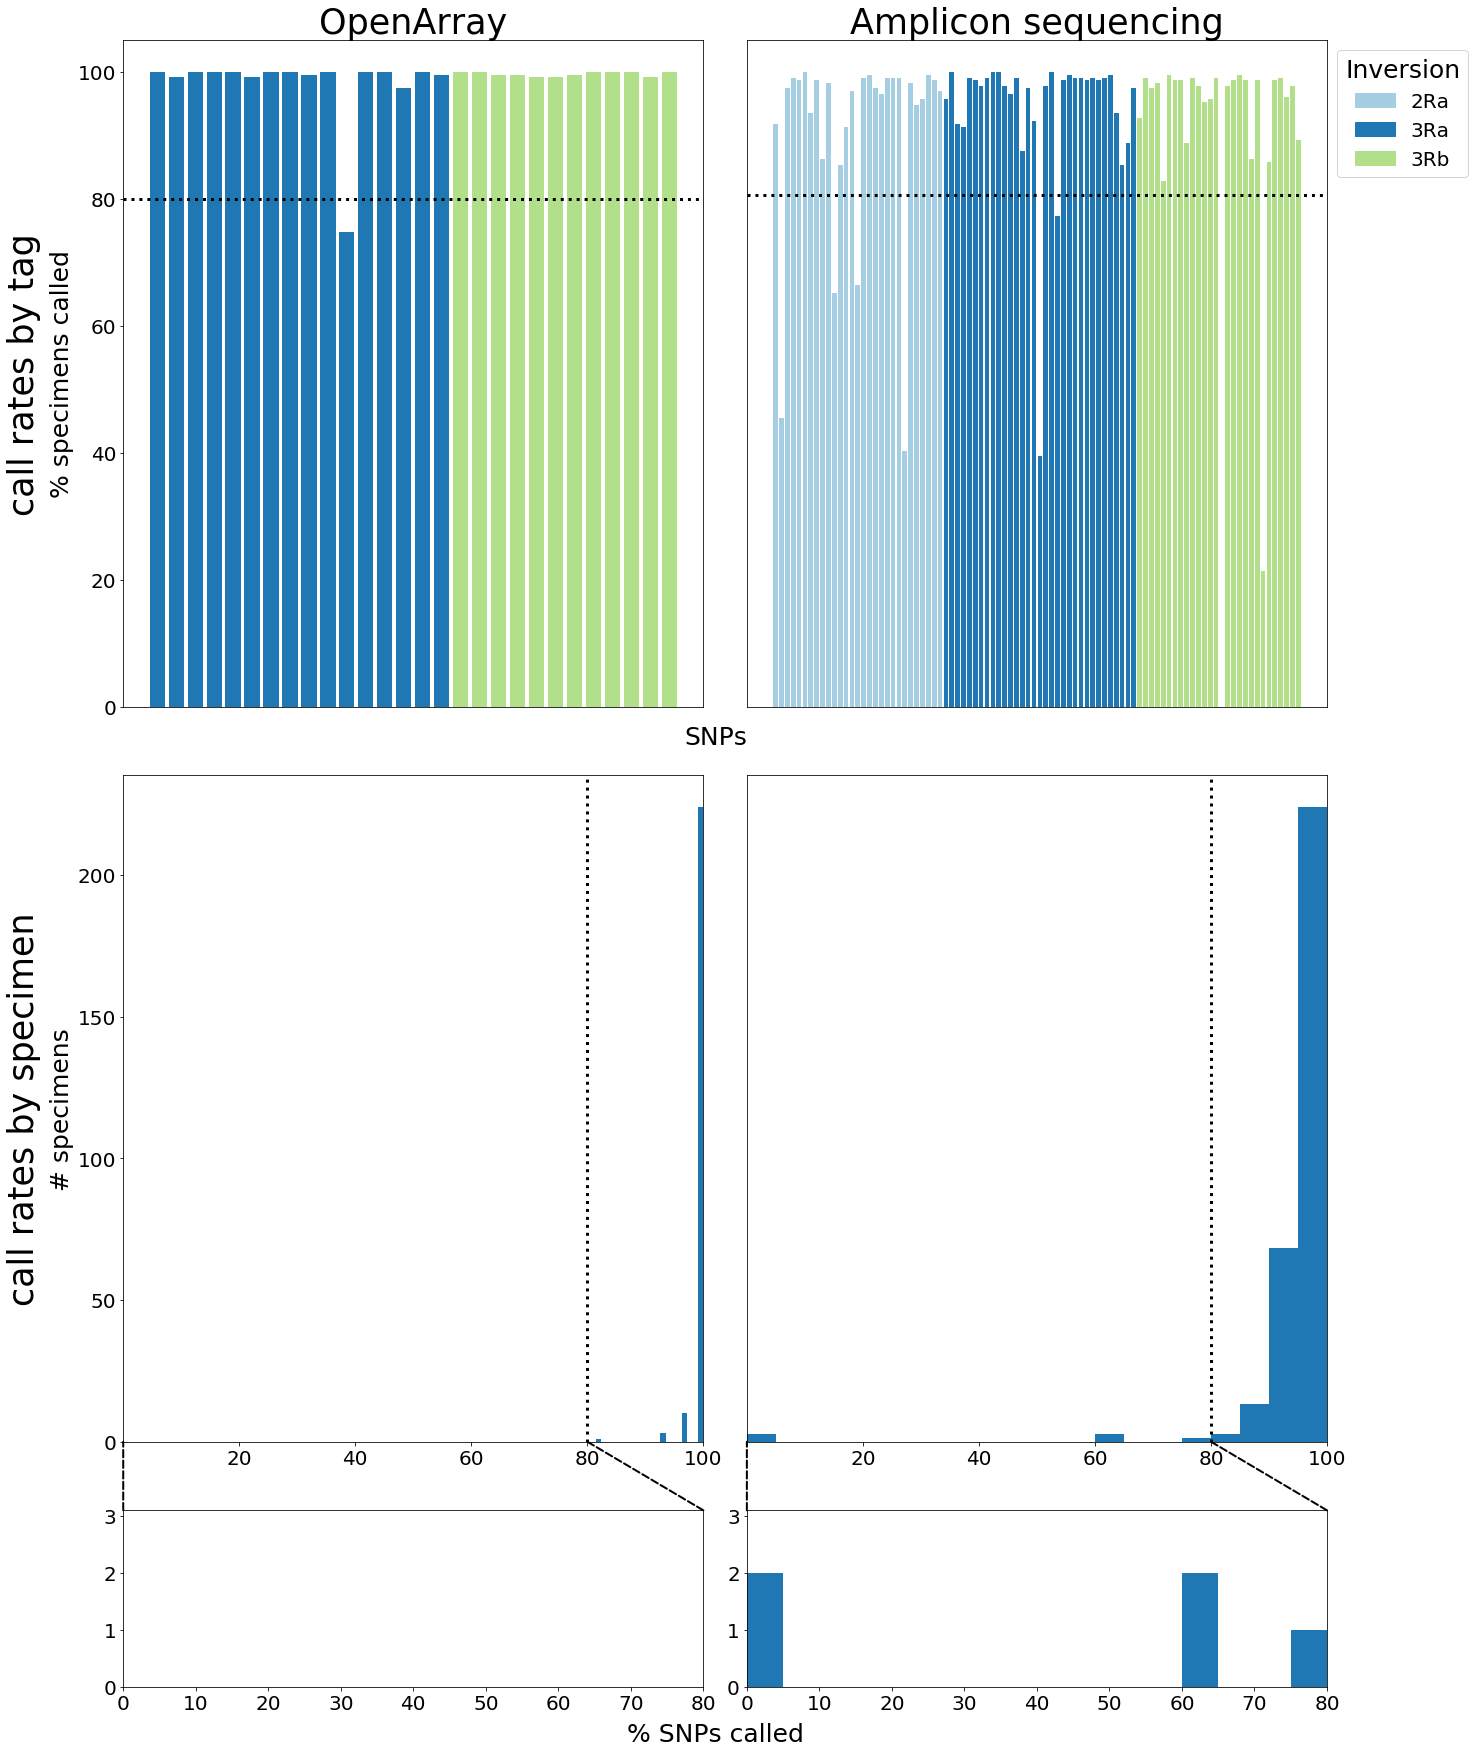

In [47]:
from matplotlib.patches import ConnectionPatch

fig = plt.figure(figsize=(20, 24))
gs = fig.add_gridspec(7, 2)

ax5 = fig.add_subplot(gs[:3, 0])
ax6 = fig.add_subplot(gs[:3, 1])
ax1 = fig.add_subplot(gs[3:6, 0])
ax2 = fig.add_subplot(gs[3:6, 1])
ax3 = fig.add_subplot(gs[6, 0])
ax4 = fig.add_subplot(gs[6, 1])

##data
ax1.hist( oa_missing_specs["n_called"], bins=20)
ax1.set_xlim(0, 100)
ax1.axvline(x=80, linewidth=3, color="black", linestyle=":")

ax2.hist( amp_missing_specs["n_called"], bins=20)
ax2.set_xlim(0, 100)
ax2.axvline(x=80, linewidth=3, color="black", linestyle=":")

ax3.hist( oa_missing_specs["n_called"], bins=20)
ax3.set_xlim(0, 80)
ax3.set_ylim(0, 3.1)

ax4.hist( amp_missing_specs["n_called"], bins=20)
ax4.set_xlim(0, 80)
ax4.set_ylim(0, 3.1)

ax5.bar(x = range(len(oa_missing_SNPs)), 
               height = oa_missing_SNPs["n_called"], 
       color=oa_missing_SNPs["label"].apply(lambda x: colors_dict[x]))
ax5.axhline(y=80, linewidth=3, color="black", linestyle=":")

ax6.bar(x = range(len(amp_missing_SNPs)), 
               height = amp_missing_SNPs["n_called"], 
       color=amp_missing_SNPs["label"].apply(lambda x: colors_dict[x]))
ax6.axhline(y=80, linewidth=3, color="black", linestyle=":")

##labels

ax1.set_ylabel("# specimens", fontsize=25)
ax5.set_ylabel("% specimens called", fontsize=25)

ax5.set_title("OpenArray", fontsize=35)
ax6.set_title("Amplicon sequencing", fontsize=35)

fig.text(0.47, -0.01, '% SNPs called', ha = "center", fontsize=25)
fig.text(0.47, ax5.get_position().p0[1], 'SNPs', ha = "center", fontsize=25)
fig.text(-.2, 0.5, "call rates by specimen", va = "center", rotation = "vertical",
         fontsize=35, transform=ax1.transAxes)
fig.text(-.2, 0.5, "call rates by tag", va = "center", rotation = "vertical",
         fontsize=35, transform=ax5.transAxes)

##ticks
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.tick_params(labelsize=20)

ax2.get_yaxis().set_visible(False)
ax6.get_yaxis().set_visible(False)
ax5.get_xaxis().set_ticks([])
ax6.get_xaxis().set_ticks([])
 
xticks = ax1.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)

xticks = ax2.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)

ax3.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax4.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

##legend
color_handles = list()

for inversion in (colors_dict.keys()):
    patch = matplotlib.patches.Patch(color=colors_dict[inversion], label=inversion)
    color_handles.append(patch)

legend = ax6.legend(handles = color_handles, bbox_to_anchor=(1, 1), title="Inversion", 
                   fontsize=20)

legend.get_title().set_fontsize(25)

##connecting lines

connect_style = {"color" : "black", "linestyle" : "--", "linewidth" : 2}

con_1_3_a = ConnectionPatch(xyA=(0, 1), xyB=(0, 0), coordsA="axes fraction", coordsB="data",
                      axesA=ax3, axesB=ax1, **connect_style)
con_1_3_b = ConnectionPatch(xyA=(1, 1), xyB=(80, 0), coordsA="axes fraction", coordsB="data",
                      axesA=ax3, axesB=ax1, **connect_style)

con_2_4_a = ConnectionPatch(xyA=(0, 1), xyB=(0, 0), coordsA="axes fraction", coordsB="data",
                      axesA=ax4, axesB=ax2, **connect_style)
con_2_4_b = ConnectionPatch(xyA=(1, 1), xyB=(80, 0), coordsA="axes fraction", coordsB="data",
                      axesA=ax4, axesB=ax2, **connect_style)

ax3.add_artist(con_1_3_b)
ax3.add_artist(con_1_3_a)

ax4.add_artist(con_2_4_b)
ax4.add_artist(con_2_4_a)

outString = ingenos.make_date_stamp("../results/fig_S2")

plt.tight_layout()

#plt.savefig(outString, bbox_inches="tight");